# **Introduction to CNN**
In machine learning, a classifier assigns a class label to a data point. For example, an image classifier produces a class label (e.g, bird, plane) for what objects exist within an image. A convolutional neural network, or CNN for short, is a type of classifier, which excels at solving this problem!

A CNN is a neural network: an algorithm used to recognize patterns in data. Neural Networks in general are composed of a collection of neurons that are organized in layers, each with their own learnable weights and biases. Let’s break down a CNN into its basic building blocks.

A tensor can be thought of as an n-dimensional matrix. In the CNN above, tensors will be 3-dimensional with the exception of the output layer.
A neuron can be thought of as a function that takes in multiple inputs and yields a single output. The outputs of neurons are represented above as the red → blue activation maps.
A layer is simply a collection of neurons with the same operation, including the same hyperparameters.
Kernel weights and biases, while unique to each neuron, are tuned during the training phase, and allow the classifier to adapt to the problem and dataset provided. They are encoded in the visualization with a yellow → green diverging colorscale. The specific values can be viewed in the Interactive Formula View by clicking a neuron or by hovering over the kernel/bias in the Convolutional Elastic Explanation View.
A CNN conveys a differentiable score function, which is represented as class scores in the visualization on the output layer <a href="https://poloclub.github.io/cnn-explainer/" target="_blank">[1]</a>.



## Importing the dataset

Link: https://www.kaggle.com/datasets/dansbecker/food-101

Content
This is the Food 101 dataset, also available from https://www.vision.ee.ethz.ch/datasets_extra/food-101/

It contains images of food, organized by type of food. It was used in the Paper "Food-101 – Mining Discriminative Components with Random Forests" by Lukas Bossard, Matthieu Guillaumin and Luc Van Gool. It's a good (large dataset) for testing computer vision techniques.

Acknowledgements
The Food-101 data set consists of images from Foodspotting [2] which are not property of the Federal Institute of Technology Zurich (ETHZ). Any use beyond scientific fair use must be negociated with the respective picture owners according to the Foodspotting terms of use [3].

[2] http://www.foodspotting.com/
[3] http://www.foodspotting.com/terms/

In [ ]:
import zipfile
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-30 16:34:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   155MB/s    in 0.7s    

2022-10-30 16:34:18 (155 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



More specifically:

A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
A test directory with the same structure as the train directory.
Example of file structure

pizza_steak <- top level folder

*   Train
  * pizza
      * 1008104.jpg
      * 1638227.jpg
      * .....

  * steak
      * 1000205.jpg
      * 1647351.jpg
      * .....
*   Test
 * pizza
      * 1001116.jpg
      * 1507019.jpg
      * .....

  * steak
      * 1000205.jpg
      * 1653815.jpg
      * .....

### *ls* commands to insepct data 

In [ ]:
#check folders 
!ls pizza_steak

test  train


In [ ]:
#check labels
!ls pizza_steak/train/

pizza  steak


In [ ]:
#check samples insite of the directory/labels
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

### Listing the same information for the pizza directory in the test folder.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


## Exploring the dataset


In [ ]:
# View 3 random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_three_images(target_dir, target_class):
    """
    Randomly selects and displays 3 random images from `target_class` folder in `target_dir` folder.
    
    Requires target_dir to be in format:
        target_dir
                 |target_class_1
                 |target_class_2
                 |...
                 
    """
    target_path = target_dir+target_class
    file_names = os.listdir(target_path)
    target_images = random.sample(file_names, 3)
    
    # Plot images
    plt.figure(figsize=(15, 6))
    for i, img in enumerate(target_images):
        img_path = target_path + "/" + img
        plt.subplot(1, 3, i+1)
        plt.imshow(mpimg.imread(img_path))
        plt.title(target_class)
        plt.axis("off")

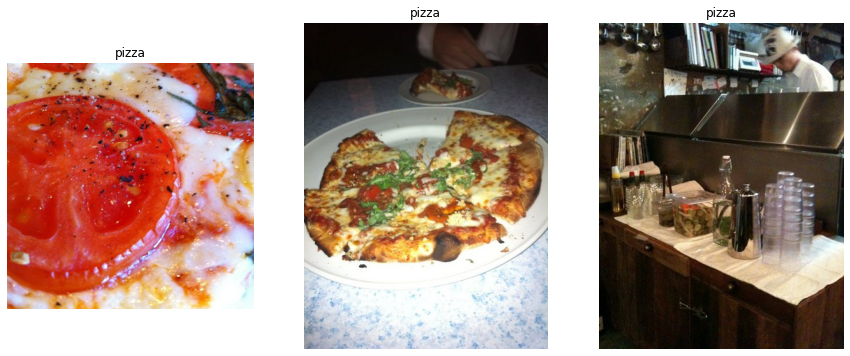

In [ ]:
view_three_images(target_dir="pizza_steak/train/", 
                  target_class="pizza")

In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


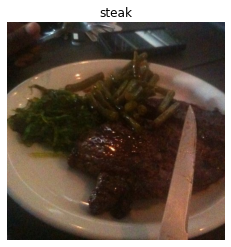

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You'll notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

In [ ]:
# View the img (actually just a big array/tensor)
img

array([[[57, 34, 26],
        [51, 28, 20],
        [61, 38, 30],
        ...,
        [46, 58, 72],
        [52, 64, 78],
        [46, 58, 72]],

       [[52, 29, 21],
        [51, 28, 20],
        [62, 39, 31],
        ...,
        [46, 58, 72],
        [49, 61, 75],
        [45, 57, 71]],

       [[53, 30, 22],
        [54, 31, 23],
        [60, 37, 29],
        ...,
        [46, 55, 70],
        [47, 56, 71],
        [47, 56, 71]],

       ...,

       [[31, 29, 32],
        [35, 33, 36],
        [33, 31, 34],
        ...,
        [28, 21, 13],
        [31, 24, 16],
        [29, 22, 16]],

       [[35, 33, 36],
        [37, 35, 38],
        [34, 32, 35],
        ...,
        [25, 18, 10],
        [31, 24, 16],
        [32, 25, 19]],

       [[30, 28, 31],
        [34, 32, 35],
        [35, 33, 36],
        ...,
        [30, 23, 15],
        [34, 27, 19],
        [30, 23, 17]]], dtype=uint8)

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

## Building the CNN model

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
    | ----- | ----- | ----- |
    | Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
    | Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
    | Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
    | Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
    | Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
    | Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
    | Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
    | Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png),
        "*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

In [ ]:
#Define some parameters for the loader:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

### Split in train, validation and test set
It's good practice to use a validation split when developing your model. Use 80% of the images for training and 20% for validation.

In [ ]:
import tensorflow as tf

In [ ]:
# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                               validation_split=0.2,
                                               subset="training",
                                               seed=123,
                                               batch_size=batch_size, # number of images to process at a time 
                                               image_size=(img_height, img_width)) # convert all images to be 224 x 224

                                               


Found 1500 files belonging to 2 classes.
Using 1200 files for training.


In [ ]:

validation_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                               validation_split=0.2,
                                               subset="validation",
                                               seed=123,
                                               batch_size=batch_size,
                                               image_size=(img_height, img_width))



Found 1500 files belonging to 2 classes.
Using 300 files for validation.


In [ ]:

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                               batch_size=32,
                                               image_size=(img_height, img_width),
                                               seed=42)

Found 500 files belonging to 2 classes.


### Create the model

In [ ]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),# also rescaling can be part of the arquitecture
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

In [ ]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
epochs=10
history_1 = model_1.fit(train_data,
                        epochs=epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        )

Epoch 1/10
38/38 [==============================] - 84s 2s/step - loss: 0.6015 - accuracy: 0.6742 - val_loss: 0.4577 - val_accuracy: 0.7867
Epoch 2/10
38/38 [==============================] - 84s 2s/step - loss: 0.4472 - accuracy: 0.8033 - val_loss: 0.4317 - val_accuracy: 0.7900
Epoch 3/10
38/38 [==============================] - 84s 2s/step - loss: 0.4113 - accuracy: 0.8242 - val_loss: 0.4010 - val_accuracy: 0.8067
Epoch 4/10
38/38 [==============================] - 83s 2s/step - loss: 0.3333 - accuracy: 0.8650 - val_loss: 0.4144 - val_accuracy: 0.7967
Epoch 5/10
38/38 [==============================] - 84s 2s/step - loss: 0.2787 - accuracy: 0.8983 - val_loss: 0.4120 - val_accuracy: 0.8533
Epoch 6/10
38/38 [==============================] - 83s 2s/step - loss: 0.2238 - accuracy: 0.9175 - val_loss: 0.4126 - val_accuracy: 0.8233
Epoch 7/10
38/38 [==============================] - 83s 2s/step - loss: 0.1361 - accuracy: 0.9575 - val_loss: 0.4454 - val_accuracy: 0.7967
Epoch 8/10
38/38 [==

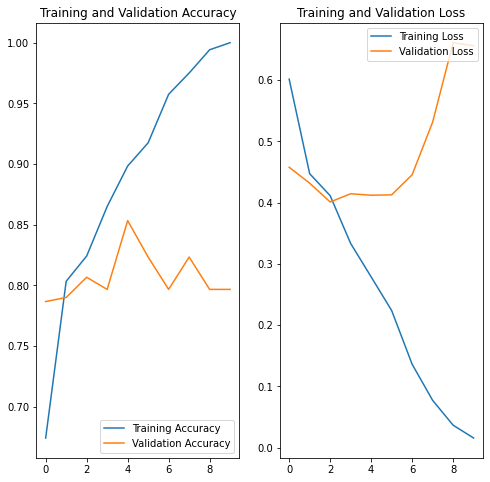

In [ ]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

### Hyperparameter
the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output


Let's discuss some of the components of the Conv2D layer:

* The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* filters - these are the number of "feature extractors" that will be moving over our images.
* kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
* padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# Google colab arquitecture
model_2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),# also rescaling can be part of the arquitecture
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation="sigmoid") # binary activation output)
])

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
epochs=10
history_2 = model_2.fit(train_data,
                        epochs=epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        )

Epoch 1/10
38/38 [==============================] - 65s 2s/step - loss: 0.8361 - accuracy: 0.6242 - val_loss: 0.4915 - val_accuracy: 0.8100
Epoch 2/10
38/38 [==============================] - 63s 2s/step - loss: 0.4525 - accuracy: 0.7992 - val_loss: 0.4678 - val_accuracy: 0.7633
Epoch 3/10
38/38 [==============================] - 64s 2s/step - loss: 0.3957 - accuracy: 0.8242 - val_loss: 0.3670 - val_accuracy: 0.8567
Epoch 4/10
38/38 [==============================] - 65s 2s/step - loss: 0.3143 - accuracy: 0.8733 - val_loss: 0.3501 - val_accuracy: 0.8433
Epoch 5/10
38/38 [==============================] - 65s 2s/step - loss: 0.2908 - accuracy: 0.8783 - val_loss: 0.3976 - val_accuracy: 0.8233
Epoch 6/10
38/38 [==============================] - 63s 2s/step - loss: 0.1961 - accuracy: 0.9317 - val_loss: 0.4274 - val_accuracy: 0.8267
Epoch 7/10
38/38 [==============================] - 65s 2s/step - loss: 0.1124 - accuracy: 0.9625 - val_loss: 0.5471 - val_accuracy: 0.7900
Epoch 8/10
38/38 [==

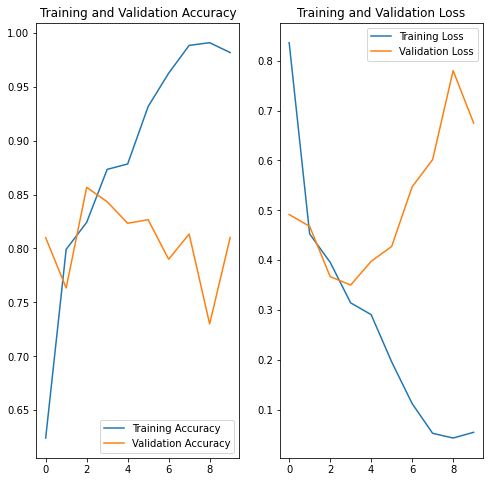

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Avoid overfiting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60%-80% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

Data augmentation: Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

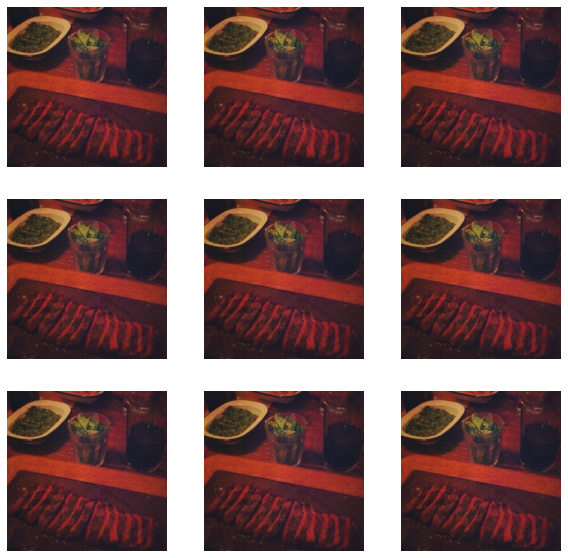

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

In [ ]:
model_3 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation="sigmoid") # binary activation output)
])

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
epochs=10
history_3 = model_3.fit(train_data,
                        epochs=epochs,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        )

Epoch 1/10
38/38 [==============================] - 73s 2s/step - loss: 0.7631 - accuracy: 0.5083 - val_loss: 0.6754 - val_accuracy: 0.5533
Epoch 2/10
38/38 [==============================] - 73s 2s/step - loss: 0.6255 - accuracy: 0.6825 - val_loss: 0.4858 - val_accuracy: 0.7800
Epoch 3/10
38/38 [==============================] - 72s 2s/step - loss: 0.5013 - accuracy: 0.7733 - val_loss: 0.4447 - val_accuracy: 0.7933
Epoch 4/10
38/38 [==============================] - 73s 2s/step - loss: 0.4893 - accuracy: 0.7692 - val_loss: 0.4857 - val_accuracy: 0.8067
Epoch 5/10
38/38 [==============================] - 72s 2s/step - loss: 0.4904 - accuracy: 0.7775 - val_loss: 0.4629 - val_accuracy: 0.7733
Epoch 6/10
38/38 [==============================] - 73s 2s/step - loss: 0.4390 - accuracy: 0.8192 - val_loss: 0.4101 - val_accuracy: 0.8333
Epoch 7/10
38/38 [==============================] - 72s 2s/step - loss: 0.4081 - accuracy: 0.8208 - val_loss: 0.3958 - val_accuracy: 0.8233
Epoch 8/10
38/38 [==

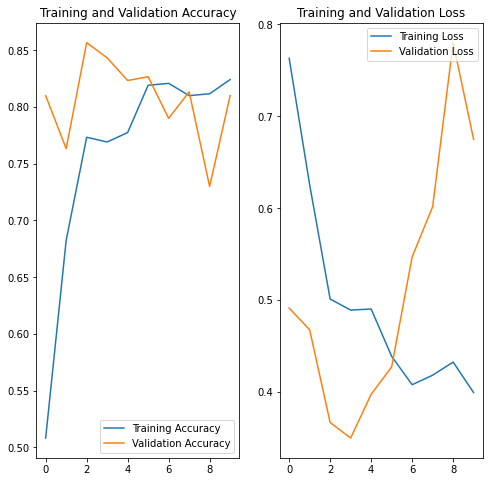

In [ ]:
acc = history_3.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Test models

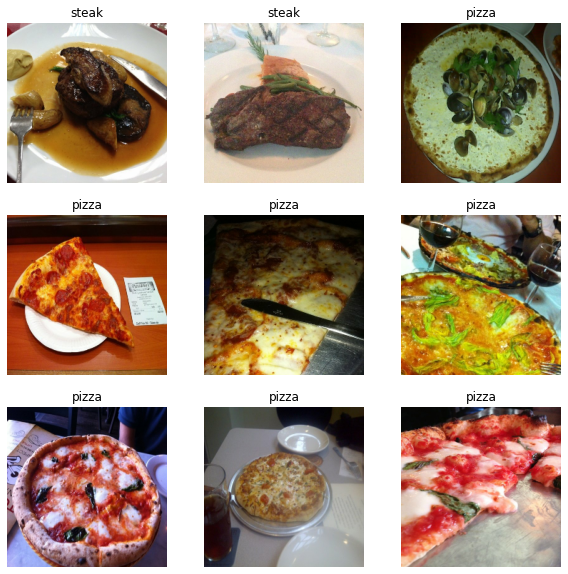

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 10s 620ms/step - loss: 0.5426 - accuracy: 0.8360


[0.542606770992279, 0.8360000252723694]

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 8s 454ms/step - loss: 0.5710 - accuracy: 0.8300


[0.5710353851318359, 0.8299999833106995]

In [ ]:
model_3.evaluate(test_data)

16/16 [==============================] - 8s 453ms/step - loss: 0.3535 - accuracy: 0.8420


[0.3535381257534027, 0.8420000076293945]

--2022-10-30 19:06:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-10-30 19:06:06 (32.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



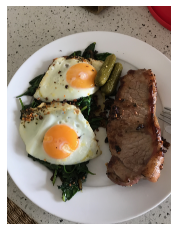

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
# Make a prediction on custom image tensor
pred = model_1.predict(steak)
pred

1/1 [==============================] - 0s 207ms/step


array([[0.50247055]], dtype=float32)

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 71ms/step


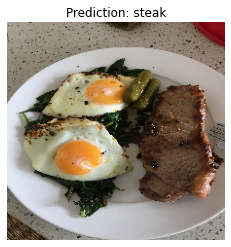

In [ ]:
# Test our model on a custom image
pred_and_plot(model_1, "03-steak.jpeg", class_names)

In [ ]:
# View 3 random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def predict_images(model, target_dir, target_class):
    target_path = target_dir+target_class
    file_names = os.listdir(target_path)
    target_images = random.sample(file_names, 25)
    
    for i, img in enumerate(target_images):
        img_path = target_path + "/" + img
        out=load_and_prep_image(img_path)
        out_img = tf.expand_dims(out, axis=0) 
        pred = model.predict(out_img)
        pred_class = class_names[int(tf.round(pred)[0][0])]
        print(pred_class)

In [ ]:
predict_images(model_1, target_dir="pizza_steak/test/",
                        target_class="steak")

1/1 [==============================] - 0s 45ms/step
steak
1/1 [==============================] - 0s 40ms/step
steak
1/1 [==============================] - 0s 38ms/step
steak
1/1 [==============================] - 0s 41ms/step
steak
1/1 [==============================] - 0s 42ms/step
steak
1/1 [==============================] - 0s 38ms/step
steak
1/1 [==============================] - 0s 51ms/step
steak
1/1 [==============================] - 0s 39ms/step
pizza
1/1 [==============================] - 0s 41ms/step
steak
1/1 [==============================] - 0s 39ms/step
steak
1/1 [==============================] - 0s 38ms/step
steak
1/1 [==============================] - 0s 47ms/step
steak
1/1 [==============================] - 0s 37ms/step
steak
1/1 [==============================] - 0s 37ms/step
steak
1/1 [==============================] - 0s 39ms/step
steak
1/1 [==============================] - 0s 38ms/step
steak
1/1 [==============================] - 0s 40ms/step
steak
1/1 [=========